test train split
cross validation and model performance
hyperparameters tuning
input feature, output feature from dataset using iloc() then test train split method to xtrain, xtest, ytrain and ytest data. 
pass xtest, ytest data into trained model to get ypredict. then compare ypredict to actual output ytest.   

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

**1. Student performance**

In [45]:
df = pd.read_csv(r'c:\Users\sanju\Desktop\student_performance.csv')
df.head()
df

,IQ,CGPA,10th_Marks,12th_Marks,Communication_Skills,Placed
0,114,3.14,54,97,2.62,0
1,117,6.09,89,75,4.56,1
2,134,9.86,73,80,6.83,1
3,137,5.52,100,63,6.96,1
4,137,6.37,82,58,2.84,1
...,...,...,...,...,...,...
95,73,5.38,78,43,6.18,1
96,112,6.43,63,38,9.74,1
97,147,5.37,75,78,9.90,0
98,91,4.26,38,36,4.09,1


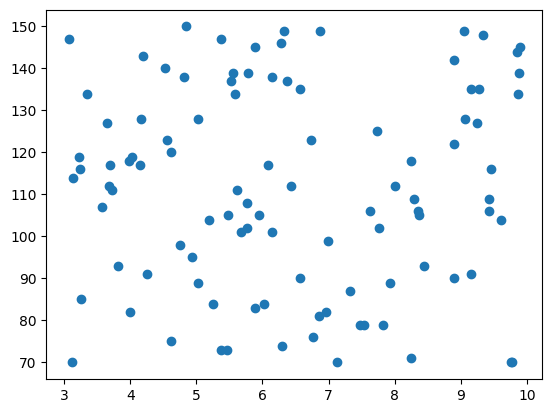

In [46]:
plt.scatter( df['CGPA'], df['IQ'])

In [47]:
df.describe()

,IQ,CGPA,10th_Marks,12th_Marks,Communication_Skills,Placed
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,111.230000,6.406600,60.500000,53.180000,4.784900,0.500000
std,23.993204,2.041801,22.451069,26.458422,2.930114,0.502519
min,70.000000,3.070000,20.000000,10.000000,0.120000,0.000000
25%,90.750000,4.802500,41.750000,31.500000,2.490000,0.000000
50%,111.500000,6.140000,59.500000,52.500000,4.550000,0.500000
75%,134.000000,8.242500,78.750000,75.250000,7.060000,1.000000
max,150.000000,9.890000,100.000000,99.000000,9.900000,1.000000


In [48]:
df.dtypes

IQ                        int64
CGPA                    float64
10th_Marks                int64
12th_Marks                int64
Communication_Skills    float64
Placed                    int64
dtype: object

In [49]:
df_temp = df[['IQ','CGPA','Placed']]
df_temp

,IQ,CGPA,Placed
0,114,3.14,0
1,117,6.09,1
2,134,9.86,1
3,137,5.52,1
4,137,6.37,1
...,...,...,...
95,73,5.38,1
96,112,6.43,1
97,147,5.37,0
98,91,4.26,1


In [50]:
input_features = df_temp.iloc [:, 0:2]
output_features = df_temp.iloc [:, 2]
display(input_features)


,IQ,CGPA
0,114,3.14
1,117,6.09
2,134,9.86
3,137,5.52
4,137,6.37
...,...,...
95,73,5.38
96,112,6.43
97,147,5.37
98,91,4.26


In [51]:
display(output_features)

0     0
1     1
2     1
3     1
4     1
     ..
95    1
96    1
97    0
98    1
99    0
Name: Placed, Length: 100, dtype: int64

In [52]:
# spliitng the input and output features into test and train data
x_train, x_test, y_train, y_test = train_test_split(input_features,
                                                   output_features,
                                                  test_size= 0.2,
                                                  random_state= 42)

In [53]:
# creating a Decision Tree class with hyperparameters
dt = DecisionTreeClassifier( criterion= 'gini',
                            max_depth= 2
                            )

In [54]:
# training the model 
dt.fit( x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[0] <= 126.0\ngini = 0.5\nsamples = 80\nvalue = [40, 40]'),
 Text(0.25, 0.5, 'x[1] <= 9.025\ngini = 0.488\nsamples = 52\nvalue = [30.0, 22.0]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.498\nsamples = 47\nvalue = [25, 22]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.75, 0.5, 'x[1] <= 3.91\ngini = 0.459\nsamples = 28\nvalue = [10, 18]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.48\nsamples = 25\nvalue = [10, 15]')]

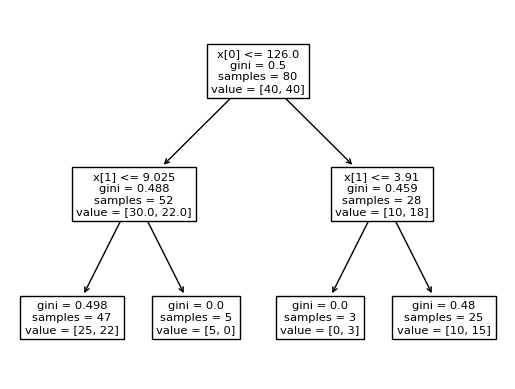

In [55]:
plot_tree(dt) # viewing the decision tree

In [56]:
# predictions
dt.predict(x_test)  # clearly it is showing sign of overfiting as predicted value is not alwys equal to true value in y_test.

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [57]:
y_test

83    0
53    1
70    0
45    1
44    1
39    1
22    0
80    0
10    1
0     0
18    1
30    0
73    0
33    0
90    1
4     1
76    1
77    0
12    0
31    1
Name: Placed, dtype: int64

In [58]:
x_test

,IQ,CGPA
83,118,3.98
53,112,8.01
70,76,6.76
45,70,7.12
44,70,9.76
39,105,8.37
22,149,6.87
80,93,8.45
10,128,9.06
0,114,3.14


In [59]:
# saving the predicted values in a varible from metrics calculation 
y_predict = dt.predict(x_test)

In [60]:
# calculting r2 value
from sklearn.metrics import r2_score
r2_score(y_test, y_predict) # overfitting

-0.6000000000000001

**1.1 Hyperparemeters Tuning**

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
# setting the parameters
param_grid = {
    'max_depth':[1,2,3,4,5,6,7,8,9,10,None],
    'criterion': ['gini', 'log_loss', 'entropy'],
    'max_features': [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1.0],
    'min_samples_split': [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1.0]
}

In [63]:
reg = GridSearchCV(DecisionTreeClassifier(), param_grid = param_grid) # grid search method to tune the hyperparameters

In [64]:
reg.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'log_loss', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                          0.8, 0.9, 1.0],
                         'min_samples_split': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                               0.7, 0.8, 0.9, 1.0]})

In [65]:
reg.best_score_ # best score after tuning the hyperparamets

0.625

In [66]:
reg.best_params_ # best hyperparamets 

{'criterion': 'log_loss',
 'max_depth': 9,
 'max_features': 0.2,
 'min_samples_split': 0.1}

In [67]:
reg.best_estimator_

DecisionTreeClassifier(criterion='log_loss', max_depth=9, max_features=0.2,
                       min_samples_split=0.1)

**2. Iris dataset**

In [68]:
from sklearn import datasets
iris = datasets.load_iris()

In [69]:
df = pd.DataFrame( iris.data,
                   columns= iris.feature_names,
                   )

In [70]:
df['Target'] = iris.target

In [71]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [72]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
78,6.0,2.9,4.5,1.5,1
91,6.1,3.0,4.6,1.4,1
34,4.9,3.1,1.5,0.2,0
101,5.8,2.7,5.1,1.9,2
146,6.3,2.5,5.0,1.9,2


In [73]:
cond = df['Target'] == 1
df[cond].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [74]:
# splliting the data into input and output
x = df.iloc[: , 0:4]
y = df.iloc[:,4]

In [75]:
# spliitng the input and output features into test and train data
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size= 0.2,
                                                   random_state= 42)

In [76]:
# creating a Decision Tree class with hyperparameters
dt = DecisionTreeClassifier( criterion= 'gini',
                            max_depth= 5 
                            )

In [77]:
# training the model 
dt.fit( x_train, y_train)

DecisionTreeClassifier(max_depth=5)

[Text(0.3076923076923077, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.75, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.5833333333333334, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.4166666666666667, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.5833333333333334, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.4166666666666667, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.25, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.384

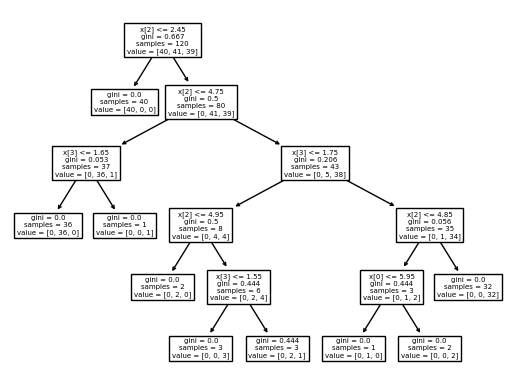

In [83]:
# viewing the decision tree
plot_tree(dt)

In [78]:
# predictions
dt.predict(x_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [79]:
# saving the predicted values in a varible from metrics calculation 
y_predicted = dt.predict(x_test)

In [80]:
x_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [81]:
# calculting r2 value
from sklearn.metrics import r2_score
r2_score(y_test, y_predicted) # we r getting 1 as it is quite a simple and straightforward data

1.0